### Part Two
<br>
The Runs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../stats/records.csv')
off_stats = pd.read_csv('../stats/offensive_stats.csv')
def_stats = pd.read_csv('../stats/defensive_stats.csv')
pythag_wins = pd.read_csv('../stats/pythag_table.csv')

In [3]:
off_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_id            150 non-null    int64  
 1   team               150 non-null    object 
 2   year               150 non-null    int64  
 3   wins               150 non-null    int64  
 4   losses             150 non-null    int64  
 5   win_%              150 non-null    float64
 6   singles            150 non-null    int64  
 7   doubles            150 non-null    int64  
 8   triples            150 non-null    int64  
 9   home_runs          150 non-null    int64  
 10  walks              150 non-null    int64  
 11  sac_fly            150 non-null    int64  
 12  sac_bunt           150 non-null    int64  
 13  strikeouts         150 non-null    int64  
 14  outs               150 non-null    int64  
 15  r_o_error          150 non-null    int64  
 16  runs               150 non

In [4]:
off_relevant = off_stats.drop(['team_id', 'year', 'wins', 'losses', 'win_%', 'team'], axis=1)

In [5]:
def_relevant = def_stats.drop(['team_id', 'year', 'wins', 'losses', 'win_%', 'team'], axis=1)

In [6]:
off_relevant.head()

,singles,doubles,triples,home_runs,walks,sac_fly,sac_bunt,strikeouts,outs,r_o_error,...,hits,ab,avg,obs,slugging,ops,so_%,hr_%,walk_%,hits_to_run
0,819,286,37,134,455,30,35,1431,2298,69,...,1276,5005,0.254945,0.315301,0.407193,0.722493,0.255810,0.023954,0.081337,1.851959
1,941,285,23,181,564,35,32,1285,2449,55,...,1430,5164,0.276917,0.346000,0.446166,0.792166,0.219658,0.030940,0.096410,2.179878
2,926,278,29,141,560,55,50,1152,2397,36,...,1374,4923,0.279098,0.349224,0.433272,0.782496,0.204836,0.025071,0.099573,2.241436
3,888,232,19,175,525,40,27,1357,2389,54,...,1314,5060,0.259684,0.326933,0.416798,0.743732,0.237820,0.030669,0.092008,2.040373
4,1068,300,33,191,552,41,46,1153,2429,71,...,1592,5174,0.307692,0.371770,0.489177,0.860947,0.195955,0.032461,0.093814,2.543131


In [7]:
def_relevant.head()

,singles,doubles,triples,home_runs,walks,sac_fly,sac_bunt,strikeouts,outs,r_o_error,...,trip/pa,hr/pa,avg,obs,slugging,ops,so_%,hr_%,walk_%,hits_to_run
0,819,286,37,134,455,30,35,1431,2298,69,...,0.006620,0.023976,0.254945,0.317033,0.407193,0.722493,0.256039,0.023976,0.081410,2.098684
1,941,285,23,181,564,35,32,1285,2449,55,...,0.003930,0.030924,0.276917,0.348115,0.446166,0.792166,0.219546,0.030924,0.096361,1.972414
2,926,278,29,141,560,55,50,1152,2397,36,...,0.005152,0.025049,0.279098,0.352727,0.433272,0.782496,0.204654,0.025049,0.099485,2.026549
3,888,232,19,175,525,40,27,1357,2389,54,...,0.003322,0.030600,0.259684,0.329275,0.416798,0.743732,0.237279,0.030600,0.091799,2.046729
4,1068,300,33,191,552,41,46,1153,2429,71,...,0.005613,0.032489,0.307692,0.374432,0.489177,0.860947,0.196122,0.032489,0.093894,1.967862


In [8]:
off_corr = off_relevant.corr()

In [9]:
def_corr = def_relevant.corr()

In [10]:
off_corr['runs']

singles             -0.372124
doubles             -0.138335
triples             -0.223114
home_runs            0.118605
walks               -0.071158
sac_fly             -0.306695
sac_bunt            -0.336872
strikeouts           0.427933
outs                -0.309837
r_o_error           -0.208268
runs                 1.000000
plate_appearances   -0.120450
sing/pa             -0.389935
doub/pa             -0.130666
trip/pa             -0.221490
hr/pa                0.141348
hits                -0.294206
ab                   0.005751
avg                 -0.346817
obs                 -0.299729
slugging            -0.153735
ops                 -0.213170
so_%                 0.420951
hr_%                 0.141348
walk_%              -0.058467
hits_to_run         -0.884945
Name: runs, dtype: float64

In [11]:
def_corr['runs']

singles              0.442413
doubles              0.662985
triples              0.269122
home_runs            0.752698
walks                0.634555
sac_fly              0.482091
sac_bunt            -0.057726
strikeouts          -0.454680
outs                 0.261979
r_o_error            0.121547
runs                 1.000000
plate_appearances    0.776845
hits                 0.809633
ab                   0.484807
sing/pa              0.264124
doub/pa              0.569022
trip/pa              0.225706
hr/pa                0.689948
avg                  0.809361
obs                  0.878837
slugging             0.940220
ops                  0.952182
so_%                -0.567256
hr_%                 0.689948
walk_%               0.560946
hits_to_run         -0.853162
Name: runs, dtype: float64

In [12]:
off_corr_runs = off_corr['runs']

In [13]:
def_corr_runs = def_corr['runs']

In [14]:
off_corr_runs

singles             -0.372124
doubles             -0.138335
triples             -0.223114
home_runs            0.118605
walks               -0.071158
sac_fly             -0.306695
sac_bunt            -0.336872
strikeouts           0.427933
outs                -0.309837
r_o_error           -0.208268
runs                 1.000000
plate_appearances   -0.120450
sing/pa             -0.389935
doub/pa             -0.130666
trip/pa             -0.221490
hr/pa                0.141348
hits                -0.294206
ab                   0.005751
avg                 -0.346817
obs                 -0.299729
slugging            -0.153735
ops                 -0.213170
so_%                 0.420951
hr_%                 0.141348
walk_%              -0.058467
hits_to_run         -0.884945
Name: runs, dtype: float64

In [15]:
def_corr_runs

singles              0.442413
doubles              0.662985
triples              0.269122
home_runs            0.752698
walks                0.634555
sac_fly              0.482091
sac_bunt            -0.057726
strikeouts          -0.454680
outs                 0.261979
r_o_error            0.121547
runs                 1.000000
plate_appearances    0.776845
hits                 0.809633
ab                   0.484807
sing/pa              0.264124
doub/pa              0.569022
trip/pa              0.225706
hr/pa                0.689948
avg                  0.809361
obs                  0.878837
slugging             0.940220
ops                  0.952182
so_%                -0.567256
hr_%                 0.689948
walk_%               0.560946
hits_to_run         -0.853162
Name: runs, dtype: float64

In [16]:
print(off_relevant.columns)
print(len(off_relevant.columns))

Index(['singles', 'doubles', 'triples', 'home_runs', 'walks', 'sac_fly',
       'sac_bunt', 'strikeouts', 'outs', 'r_o_error', 'runs',
       'plate_appearances', 'sing/pa', 'doub/pa', 'trip/pa', 'hr/pa', 'hits',
       'ab', 'avg', 'obs', 'slugging', 'ops', 'so_%', 'hr_%', 'walk_%',
       'hits_to_run'],
      dtype='object')
26


In [17]:
print(off_relevant.columns[0])

singles


In [30]:
%matplotlib qt

In [40]:
fig, ax = plt.subplots(nrows=9, ncols=3)
ax_row=0
ax_col=0
runs = off_relevant['runs']

for col in off_relevant.columns:
    if ax_col >= 3:
        ax_row += 1
        ax_col = 0
        
        
    ax[ax_row][ax_col].scatter(off_relevant[col], runs, s=10)
    
    ax[ax_row][ax_col].set_title(f'{col.capitalize()} to Runs')
    ax[ax_row][ax_col].set_ylabel('Runs')
    ax[ax_row][ax_col].set_xlabel(col.capitalize())
    
    ax_col += 1
            
    
    
plt.tight_layout()
plt.show()

<ipython-input-40-e49c787448fb>:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


In [57]:
off_first9 = off_relevant[['singles', 'doubles', 'triples', 'home_runs', 'walks',
                           'hits', 'strikeouts', 'sac_fly', 'sac_bunt']]

off_second9 = off_relevant[['hits_to_run', 'ab', 'ops', 'avg', 'obs', 'slugging', 
                            'so_%', 'hr_%', 'walk_%']]

off_rest = off_relevant[['sing/pa', 'doub/pa', 'trip/pa', 'hr/pa',
                         'sac_fly', 'sac_bunt']]

In [58]:
def_first9 = def_relevant[['singles', 'doubles', 'triples', 'home_runs', 'walks',
                           'hits', 'strikeouts', 'sac_fly', 'sac_bunt']]

def_second9 = def_relevant[['hits_to_run', 'ab', 'ops', 'avg', 'obs', 'slugging', 
                            'so_%', 'hr_%', 'walk_%']]

def_rest = def_relevant[['sing/pa', 'doub/pa', 'trip/pa', 'hr/pa',
                         'sac_fly', 'sac_bunt']]

In [65]:
fig, ax = plt.subplots(nrows=9, ncols=3)
ax_row=0
ax_col=0
runs = off_relevant['runs']

for col in off_relevant.columns:
    if ax_col >= 3:
        ax_row += 1
        ax_col = 0
        
        
    ax[ax_row][ax_col].scatter(off_relevant[col], runs, s=10)
    
    ax[ax_row][ax_col].set_title(f'{col.capitalize()} to Runs (R = {off_corr_runs[col]})')
    ax[ax_row][ax_col].set_ylabel('Runs')
    ax[ax_row][ax_col].set_xlabel(col.capitalize())
    
    ax_col += 1
            
    
    
plt.tight_layout()
plt.show()

<ipython-input-65-a6ae13a77ebf>:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


In [249]:
fig, ax = plt.subplots(nrows=3, ncols=3)
ax_row=0
ax_col=0
runs = off_relevant['runs']

for col in off_first9.columns:
    if ax_col >= 3:
        ax_row += 1
        ax_col = 0
        
        
    ax[ax_row][ax_col].scatter(off_relevant[col], runs, s=10)
    
    ax[ax_row][ax_col].set_title(f'{col.capitalize()} to Runs (R = {round(off_corr_runs[col],2)})')
    ax[ax_row][ax_col].set_ylabel('Runs')
    ax[ax_row][ax_col].set_xlabel(col.capitalize())
    
    ax_col += 1
            
    
    
plt.tight_layout()
plt.show()

In [250]:
fig, ax = plt.subplots(nrows=3, ncols=3)
ax_row=0
ax_col=0
runs = off_relevant['runs']

for col in off_second9.columns:
    if ax_col >= 3:
        ax_row += 1
        ax_col = 0
        
        
    ax[ax_row][ax_col].scatter(off_relevant[col], runs, s=10)
    
    ax[ax_row][ax_col].set_title(f'{col.capitalize()} to Runs (R = {round(off_corr_runs[col],2)})')
    ax[ax_row][ax_col].set_ylabel('Runs')
    ax[ax_row][ax_col].set_xlabel(col.capitalize())
    
    ax_col += 1
            
        
plt.tight_layout()
plt.show()

In [251]:
fig, ax = plt.subplots(nrows=2, ncols=3)
ax_row=0
ax_col=0
runs = off_relevant['runs']

for col in off_rest.columns:
    if ax_col >= 3:
        ax_row += 1
        ax_col = 0
        
        
    ax[ax_row][ax_col].scatter(off_relevant[col], runs, s=10)
    
    ax[ax_row][ax_col].set_title(f'{col.capitalize()} to Runs (R = {round(off_corr_runs[col],2)})')
    ax[ax_row][ax_col].set_ylabel('Runs')
    ax[ax_row][ax_col].set_xlabel(col.capitalize())
    
    ax_col += 1
            
        
plt.tight_layout()
plt.show()

In [255]:
fig, ax = plt.subplots(nrows=3, ncols=3)
ax_row=0
ax_col=0
runs = def_relevant['runs']

for col in def_first9.columns:
    if ax_col >= 3:
        ax_row += 1
        ax_col = 0
        
        
    ax[ax_row][ax_col].scatter(def_relevant[col], runs, s=10)
    
    ax[ax_row][ax_col].set_title(f'{col.capitalize()} to Runs (R = {round(def_corr_runs[col],2)})')
    ax[ax_row][ax_col].set_ylabel('Runs')
    ax[ax_row][ax_col].set_xlabel(col.capitalize())
    
    ax_col += 1
            
    
    
plt.tight_layout()
plt.show()

In [256]:
fig, ax = plt.subplots(nrows=3, ncols=3)
ax_row=0
ax_col=0
runs = def_relevant['runs']

for col in def_second9.columns:
    if ax_col >= 3:
        ax_row += 1
        ax_col = 0
        
        
    ax[ax_row][ax_col].scatter(def_relevant[col], runs, s=10)
    
    ax[ax_row][ax_col].set_title(f'{col.capitalize()} to Runs (R = {round(def_corr_runs[col],2)})')
    ax[ax_row][ax_col].set_ylabel('Runs')
    ax[ax_row][ax_col].set_xlabel(col.capitalize())
    
    ax_col += 1
            
        
plt.tight_layout()
plt.show()

In [257]:
fig, ax = plt.subplots(nrows=2, ncols=3)
ax_row=0
ax_col=0
runs = def_relevant['runs']

for col in def_rest.columns:
    if ax_col >= 3:
        ax_row += 1
        ax_col = 0
        
        
    ax[ax_row][ax_col].scatter(def_relevant[col], runs, s=10)
    
    ax[ax_row][ax_col].set_title(f'{col.capitalize()} to Runs (R = {round(def_corr_runs[col],2)})')
    ax[ax_row][ax_col].set_ylabel('Runs')
    ax[ax_row][ax_col].set_xlabel(col.capitalize())
    
    ax_col += 1
            
        
plt.tight_layout()
plt.show()

In [18]:
pythag_wins.head()

,team_id,team,year,wins,losses,win_%,runs_scored,runs_allowed,pythag_win_estimate,model_pythag_win_%
0,201823,bal,2018,47,115,0.290123,622,892,0.327161,0.341790
1,201909,det,2019,47,113,0.293750,579,910,0.288171,0.305369
2,201923,bal,2019,54,107,0.335404,725,976,0.355584,0.368098
3,201903,mia,2019,56,104,0.350000,605,796,0.366156,0.377841
4,201806,kca,2018,58,104,0.358025,638,833,0.369726,0.381126


In [19]:
goal_winrate90 = pythag_wins['win_%'].quantile(q=.9)
goal_winrate80 = pythag_wins['win_%'].quantile(q=.8)
goal_winrate70 = pythag_wins['win_%'].quantile(q=.7)

In [20]:
goal_winrate90

0.5991373360938578

In [21]:
goal_winrate80

0.5712565326062259

In [22]:
goal_winrate70

0.5493827160493827

In [23]:
print(f"Min: {pythag_wins['runs_scored'].min()} Max: {pythag_wins['runs_scored'].max()}")

Min: 573 Max: 942


In [24]:
''' calculate runs allowed given runs scored and 'goal_winrate' '''

def arithm_eq_ra(rs, wr):
    return (((rs**1.81)/wr) - (rs**1.81))**(1/1.81)

In [25]:
rs = np.arange(573, 943)

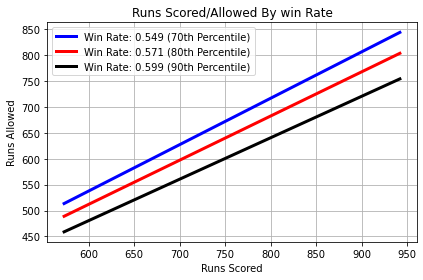

In [26]:
plt.plot(rs, arithm_eq_ra(rs, goal_winrate70), color='blue', linewidth=3, label=f'Win Rate: {round(goal_winrate70,3)} (70th Percentile)')
plt.plot(rs, arithm_eq_ra(rs, goal_winrate80), color='red', linewidth=3, label=f'Win Rate: {round(goal_winrate80, 3)} (80th Percentile)')
plt.plot(rs, arithm_eq_ra(rs, goal_winrate90), color='black', linewidth=3, label=f'Win Rate: {round(goal_winrate90, 3)} (90th Percentile)')

plt.xlabel('Runs Scored')
plt.ylabel('Runs Allowed')
plt.title(f'Runs Scored/Allowed By win Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
pythag_wins['runs_scored'].quantile(.9)

826.4999999999999

In [28]:
pythag_wins['runs_allowed'].quantile(.1)

629.7

In [29]:
arithm_eq_ra(771, goal_winrate90)

617.4880183407417

In [30]:
pythag_wins['runs_scored'].quantile(.75)

771.0

In [31]:
pythag_wins['runs_allowed'].quantile(.25)

669.25

In [32]:
arithm_eq_ra(771, goal_winrate80)

657.9547103055388

In [33]:
pythag_wins['runs_scored'].quantile(.7)

763.0

In [34]:
pythag_wins['runs_allowed'].quantile(.3)

681.7

In [35]:
arithm_eq_ra(771, goal_winrate70)

691.0404481802274

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [37]:
def_relevant['runs'].quantile(.1)

629.7

In [38]:
X, y = def_relevant['slugging'].values.reshape((-1,1)), def_relevant['runs'].values.reshape((-1,1))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [40]:
X_train.shape

(120, 1)

In [41]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
predictions = model.predict(X_test)

In [42]:
print(f'R^2 value: {lin_reg.score(X, y)}')
print(f'coef: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')

R^2 value: 0.8839152951060703
coef: [[2640.54413163]]
Intercept: [-464.88551129]


In [43]:
off_relevant.columns

Index(['singles', 'doubles', 'triples', 'home_runs', 'walks', 'sac_fly',
       'sac_bunt', 'strikeouts', 'outs', 'r_o_error', 'runs',
       'plate_appearances', 'sing/pa', 'doub/pa', 'trip/pa', 'hr/pa', 'hits',
       'ab', 'avg', 'obs', 'slugging', 'ops', 'so_%', 'hr_%', 'walk_%',
       'hits_to_run'],
      dtype='object')

In [44]:
X = off_relevant[['singles', 'doubles', 'triples', 'home_runs', 'walks', 'sac_fly',
       'sac_bunt', 'strikeouts', 'hits', 'ab', 'ops', 'avg', 'obs', 'slugging']].values.reshape(150,14)
y = off_relevant['runs'].values.reshape(-1,1)

In [45]:
X.shape

(150, 14)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [47]:
ridge_reg = Ridge()
model = ridge_reg.fit(X_train, y_train)
predictions = model.predict(X_test)

In [48]:
print(f'Coefficients: {ridge_reg.coef_}')
print(f'R^2: {ridge_reg.score(X, y)}')
print(f'Intercept: {ridge_reg.intercept_}')

Coefficients: [[-0.28481729 -0.23622961  0.20211175  0.28783315  0.0455     -0.8182855
  -0.77579529  0.08066435 -0.031102    0.18093769 -0.79484984 -0.24088282
  -0.32282272 -0.47202712]]
R^2: 0.2617935875291948
Intercept: [40.32438244]
